# NSGA-II experiment with Euclidean distance

In [1]:
import array
import random

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from deap import creator
from deap import base
from deap import tools
from deap.benchmarks.tools import hypervolume

import nsgaii.price as pr
import nsgaii.objectives as obj
import nsgaii.toolbox as tb
import nsgaii.search as sr
from nsgaii.eval import Evaluation
from nsgaii.battery import Battery

In [24]:
NDIM = 24
BOUND_LOW = 0
BOUND_UP = 10
GENS = 600
POPULATION_SIZE = 600

In [3]:
creator.create('FitnessMin', base.Fitness, weights=(-1.0, -1.0, -1.0, -1.0))
creator.create('Individual', array.array, typecode='d', fitness=creator.FitnessMin)

## Recommendation for average winter day

In [4]:
df = pd.read_csv('.exports/aggregations/average_winter_day.csv', delimiter=',')
actual = df['use'].as_matrix()
pv   = df['gen'].as_matrix()
print('Price of predicted solution: %f'%obj.cost_function_with_euclidean(actual, pv, None, actual)[0])

Price of predicted solution: 0.801744


In [29]:
%%time

# first of all, no battery
toolbox_wob = tb.setup(actual, pv, NDIM, BOUND_LOW, BOUND_UP, distance='euclidean')
pop_wob, logbook_wob, besthvpop_wob, besthv_wob = sr.search(toolbox_wob, gens=GENS, mu=POPULATION_SIZE, verbose=False)

# battery with 3 kWh
battery = Battery(3,0)
toolbox_3 = tb.setup(actual, pv, NDIM, BOUND_LOW, BOUND_UP, battery, distance='euclidean')
pop_3, logbook_3, besthvpop_3, betshv_3 = sr.search(toolbox_3, gens=GENS, mu=POPULATION_SIZE, verbose=False)

# battery with 5 kWh
battery = Battery(5,0)
toolbox_5 = tb.setup(actual, pv, NDIM, BOUND_LOW, BOUND_UP, battery, distance='euclidean')
pop_5, logbook_5, besthvpop_5, betshv_5 = sr.search(toolbox_5, gens=GENS, mu=POPULATION_SIZE, verbose=False)

Wall time: 10min 18s


### Average winter day, no battery

Number of solutions: 60
Lowest price solution: cost: 0.305088, distance 5.492020, diff 0.121018
Highest comfort solution: cost: 0.790249, distance 0.408315, diff 0.000951


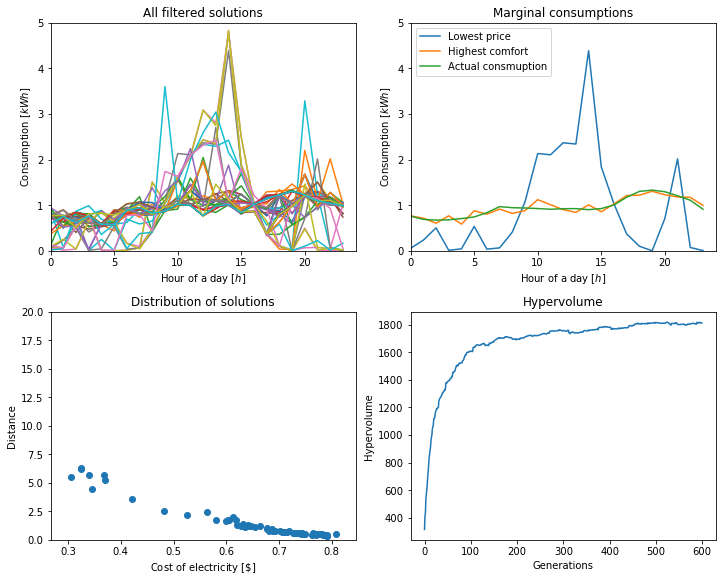

In [30]:
ev = Evaluation(besthvpop_wob, toolbox_wob, logbook_wob, actual, distance_treshold=20, smooth_treshold=1)
ev.plot()
print(ev)
plt.savefig('.exports/avg_winter.jpg', dpi=500)

### Average winter day, 3kWh battery

Number of solutions: 84
Lowest price solution: cost: 0.291125, distance 4.474235, diff 0.475679
Highest comfort solution: cost: 0.465397, distance 0.345247, diff 0.003475


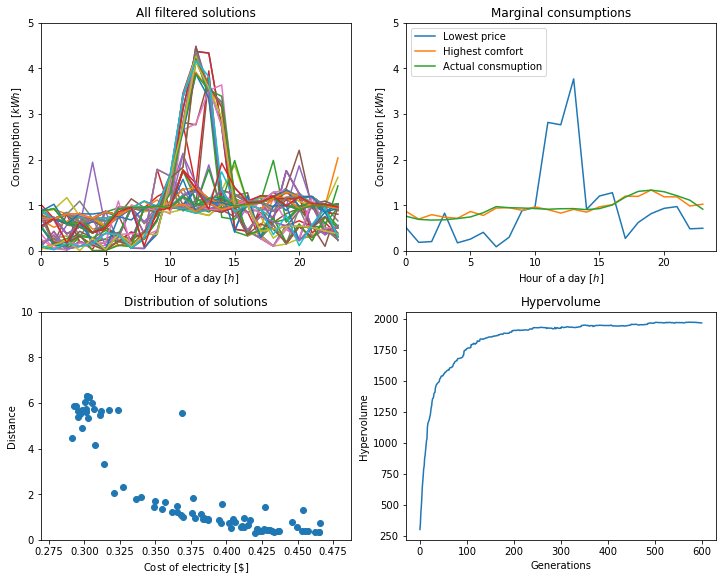

In [33]:
ev = Evaluation(besthvpop_3, toolbox_3, logbook_3, actual, distance_treshold=10)
ev.plot()
print(ev)
plt.savefig('.exports/avg_winter_3kWh.jpg', dpi=500)

### Average winter day, 5kWh battery

Number of solutions: 109
Lowest price solution: cost: 0.191020, distance 2.948092, diff 0.368887
Highest comfort solution: cost: 0.374195, distance 0.539950, diff 0.000001


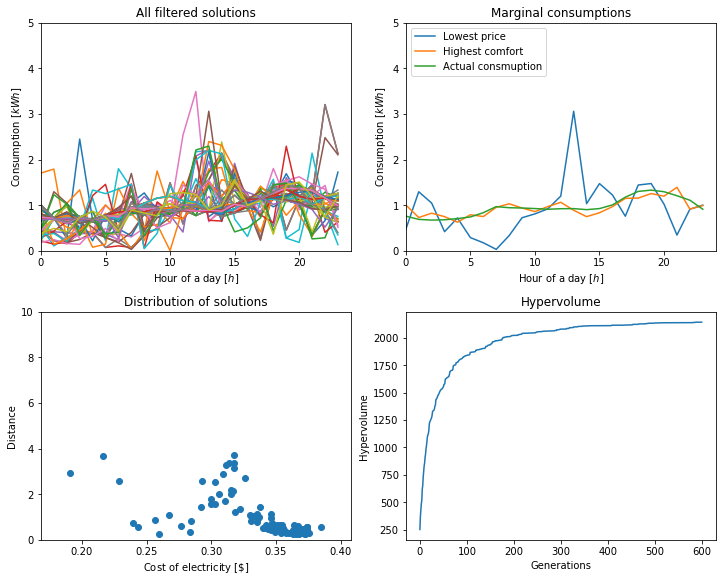

In [32]:
ev = Evaluation(besthvpop_5, toolbox_5, logbook_5, actual, distance_treshold=10)
ev.plot()
print(ev)

## Average scores of average winter day

In [80]:
import time

def get_averages(toolbox, actual, pv, gens, iterations=10):
    results = []
    
    print('Iteration: ', end='')
    for i in range(0,iterations):
        start = time.time()
        print('%d' % (i + 1), end=' ')
        pop, logbook, b_po, b_hp = sr.search(toolbox, gens=gens, verbose=False)
        
        ev = Evaluation(b_po, toolbox, logbook, actual, distance_treshold=10, smooth_treshold=1)
        
        results.append([ev.lowest_price_objectives[0], ev.lowest_price_objectives[1]])
        end = time.time()
        print('(%.2f)' % (end-start), end=', ')
    print('')
    return np.array(results)

### No batteries - 300 generations

In [49]:
results = get_averages(toolbox_wob, actual, pv, gens=300)
print('Mean', results.mean(axis=0).tolist())
print('Std', results.std(axis=0).tolist())

Iteration: 1 (19.57), 2 (21.37), 3 (22.45), 4 (21.62), 5 (22.03), 6 (21.12), 7 (22.77), 8 (22.85), 9 (21.95), 10 (24.05), 
Mean [0.32665479571481815, 6.090145987191869]
Std [0.027777043477306727, 0.8899268978570756]


### No batteries - 600 generations

In [81]:
results = get_averages(toolbox_wob, actual, pv, gens=600)
print('No battery')
print('Mean', results.mean(axis=0).tolist())
print('Std', results.std(axis=0).tolist())

Iteration: 1 (47.33), 2 (48.20), 3 (49.35), 4 (55.14), 5 (49.64), 6 (53.78), 7 (52.29), 8 (49.46), 9 (45.61), 10 (46.34), 
No battery
Mean [0.35462144230146747, 5.469322003568978]
Std [0.06899128273884451, 1.1632684120594494]


### 3kWh battery - 300 generations

In [50]:
results = get_averages(toolbox_3, actual, pv, gens=300)
print('Mean', results.mean(axis=0).tolist())
print('Std', results.std(axis=0).tolist())

Iteration: 1 (34.15), 2 (31.84), 3 (27.26), 4 (26.50), 5 (28.65), 6 (29.43), 7 (26.92), 8 (33.50), 9 (34.25), 10 (32.10), 
Mean [0.2953717555195766, 4.887981239633609]
Std [0.030754289216585653, 1.3510490934500023]


### 3kWh battery - 600 generations

In [51]:
results = get_averages(toolbox_3, actual, pv, gens=600)
print('Mean', results.mean(axis=0).tolist())
print('Std', results.std(axis=0).tolist())

Iteration: 1 (61.78), 2 (66.96), 3 (59.58), 4 (59.45), 5 (60.96), 6 (57.92), 7 (65.57), 8 (66.18), 9 (58.78), 10 (59.54), 
Mean [0.2967801360400915, 4.657335817507894]
Std [0.04176910250641158, 1.9395803390442918]


### 5kWh battery - 300 generations

In [52]:
results = get_averages(toolbox_5, actual, pv, gens=300)
print('Mean', results.mean(axis=0).tolist())
print('Std', results.std(axis=0).tolist())

Iteration: 1 (30.80), 2 (31.10), 3 (32.47), 4 (30.72), 5 (30.60), 6 (29.82), 7 (35.71), 8 (25.61), 9 (25.07), 10 (25.20), 
Mean [0.24069463072523326, 1.830537033204242]
Std [0.03328531641328282, 1.1790037301943352]


### 5kWh battery - 600 generations

In [53]:
results = get_averages(toolbox_5, actual, pv, gens=600)
print('Mean', results.mean(axis=0).tolist())
print('Std', results.std(axis=0).tolist())

Iteration: 1 (56.45), 2 (50.61), 3 (52.95), 4 (51.04), 5 (52.38), 6 (51.55), 7 (52.55), 8 (52.92), 9 (50.42), 10 (52.59), 
Mean [0.24640963460355975, 1.7247953170950279]
Std [0.02794133048321082, 1.0404116170460425]


## Average score for average summer day

In [64]:
df_summer = pd.read_csv('.exports/aggregations/average_summer_day.csv', delimiter=',')
actual_summer = df_summer['use'].as_matrix()
pv_summer   = df_summer['gen'].as_matrix()

### No batteries - 300 generations

In [79]:
stoolbox_wob = tb.setup(actual_summer, pv_summer, NDIM, BOUND_LOW, BOUND_UP, distance='euclidean')
results = get_averages(stoolbox_wob, actual_summer, pv_summer, gens=300)
print('Mean', results.mean(axis=0).tolist())
print('Std', results.std(axis=0).tolist())

Iteration: 1 (23.98), 2 (22.79), 3 (23.44), 4 (24.47), 5 (23.75), 6 (23.19), 7 (23.74), 8 (23.33), 9 (23.45), 10 (23.72), 
Mean [0.7319373128086815, 6.748735931284594]
Std [0.03883003816857477, 1.2092209242729266]


### No batteries - 600 generations

In [82]:
stoolbox_wob = tb.setup(actual_summer, pv_summer, NDIM, BOUND_LOW, BOUND_UP, distance='euclidean')
results = get_averages(stoolbox_wob, actual_summer, pv_summer, gens=600)
print('Mean', results.mean(axis=0).tolist())
print('Std', results.std(axis=0).tolist())

Iteration: 1 (55.45), 2 (46.36), 3 (46.53), 4 (46.16), 5 (43.52), 6 (46.08), 7 (47.72), 8 (43.57), 9 (42.70), 10 (44.61), 
Mean [0.9611694450567866, 3.507518662112912]
Std [0.06774016773561213, 0.6406551778116504]


### 3kWh batteries - 300 generations

In [68]:
battery = Battery(3,0)
stoolbox_3 = tb.setup(actual_summer, pv_summer, NDIM, BOUND_LOW, BOUND_UP, battery, distance='euclidean')
results = get_averages(stoolbox_3, actual_summer, pv_summer, gens=300)
print('Mean', results.mean(axis=0).tolist())
print('Std', results.std(axis=0).tolist())

Iteration: 1 (31.06), 2 (30.83), 3 (27.84), 4 (33.59), 5 (36.10), 6 (30.33), 7 (27.95), 8 (27.93), 9 (31.29), 10 (30.62), 
Mean [0.6707558821716086, 3.2112762619706743]
Std [0.029793021013170634, 0.4913884857563147]


### 3kWh batteries - 600 generations

In [74]:
battery = Battery(3,0)
stoolbox_3 = tb.setup(actual_summer, pv_summer, NDIM, BOUND_LOW, BOUND_UP, battery, distance='euclidean')
results = get_averages(stoolbox_3, actual_summer, pv_summer, gens=600)
print('Mean', results.mean(axis=0).tolist())
print('Std', results.std(axis=0).tolist())

Iteration: 1 (74.07), 2 (77.95), 3 (73.73), 4 (71.20), 5 (59.55), 6 (59.87), 7 (65.42), 8 (63.97), 9 (59.43), 10 (59.76), 
Mean [0.7024938208475419, 2.69079340896201]
Std [0.03996390647492331, 0.7000909589398039]


### 5kWh batteries - 300 generations

In [75]:
battery = Battery(5,0)
stoolbox_5 = tb.setup(actual_summer, pv_summer, NDIM, BOUND_LOW, BOUND_UP, battery, distance='euclidean')
results = get_averages(stoolbox_5, actual_summer, pv_summer, gens=300)
print('Mean', results.mean(axis=0).tolist())
print('Std', results.std(axis=0).tolist())

Iteration: 1 (29.56), 2 (29.45), 3 (29.92), 4 (28.39), 5 (31.03), 6 (29.59), 7 (30.33), 8 (30.17), 9 (30.02), 10 (30.22), 
Mean [0.5648350706528124, 1.2567581720929752]
Std [0.04937654760996518, 0.476184357816633]


### 5kWh batteries - 600 generations

In [76]:
battery = Battery(5,0)
stoolbox_5 = tb.setup(actual_summer, pv_summer, NDIM, BOUND_LOW, BOUND_UP, battery, distance='euclidean')
results = get_averages(stoolbox_5, actual_summer, pv_summer, gens=600)
print('Mean', results.mean(axis=0).tolist())
print('Std', results.std(axis=0).tolist())

Iteration: 1 (51.33), 2 (60.00), 3 (58.88), 4 (59.08), 5 (61.54), 6 (58.93), 7 (59.06), 8 (63.67), 9 (60.48), 10 (60.68), 
Mean [0.5751813661965235, 1.295650047940905]
Std [0.049928383207375394, 0.36910795004354263]
